In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

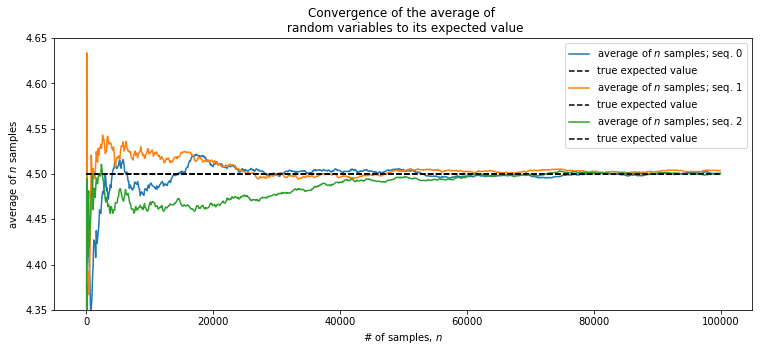

In [2]:
figsize(12.5, 5)

sample_size = 100000
expected_value = lambda_ = 4.5
poi = np.random.poisson
N_samples = range(1, sample_size, 100)

for k in range(3):
    samples = poi(lambda_, sample_size)
    
    partial_average = [samples[:i].mean() for i in N_samples]
    
    plt.plot( N_samples, partial_average, lw=1.5,label="average of $n$ samples; seq. %d"%k)
    plt.plot( N_samples, expected_value*np.ones_like( partial_average), ls = "--", label = "true expected value", c = "k" )
    
plt.ylim( 4.35, 4.65) 
plt.title( "Convergence of the average of \n random variables to its \
expected value" )
plt.ylabel( "average of $n$ samples" )
plt.xlabel( "# of samples, $n$")
plt.legend()

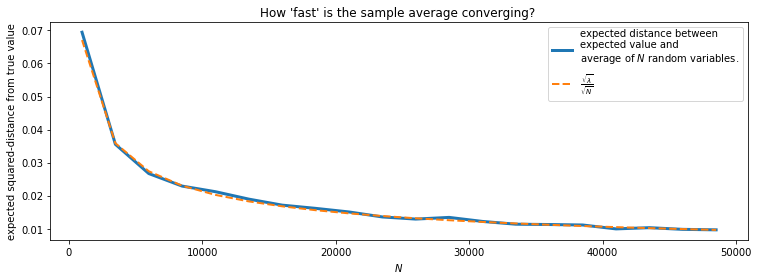

In [3]:
figsize(12.5, 4)

N_Y = 250 #use this many to approximate D(N)
N_array = np.arange(1000, 50000, 2500) #use this many samples in the approx. to the variance.
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_ #for X ~ Poi(lambda) , E[ X ] = lambda

def D_N(n):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi(lambda_, (n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value)**2).mean())

for i,n in enumerate(N_array):
    D_N_results[i] = D_N(n)

plt.xlabel( "$N$" )
plt.ylabel( "expected squared-distance from true value" )
plt.plot(N_array, D_N_results, lw = 3, label="expected distance between\nexpected value and \naverage of $N$ random variables.")
plt.plot( N_array, np.sqrt(expected_value)/np.sqrt(N_array), lw = 2, ls = "--", label = r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$" )
plt.legend()
plt.title( "How 'fast' is the sample average converging? " )

In [4]:
N = 10000
np.mean([np.random.exponential(0.5) > 5 for i in range(N)])

0.0

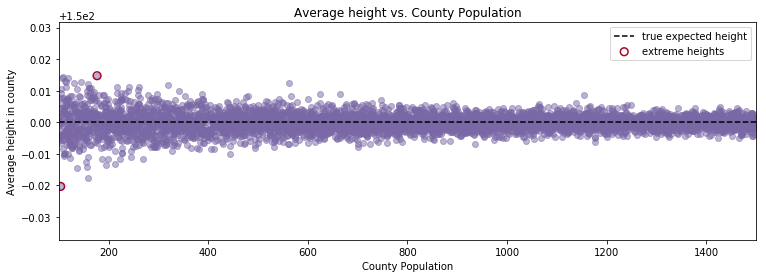

In [5]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_countries = 5000
pop_generator = np.random.randint
norm = np.random.normal

#generate some artificial population numbers
population = pop_generator(100, 1500, n_countries)

average_across_county = np.zeros(n_countries)
for i in range(n_countries):
    #generate some individuals and take the mean
    average_across_county[i] = norm(mean_height, 1./std_height, population[i]).mean()

#located the counties with the apparently most extreme average heights.
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

#plot population size vs. recorded average
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]], [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none", edgecolors = "#A60628", linewidths = 1.5,  label="extreme heights")

plt.xlim( 100, 1500 )
plt.title( "Average height vs. County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot( [100, 1500], [150, 150], color = "k", label = "true expected height", ls="--" )
plt.legend(scatterpoints = 1)

In [6]:
print("Population sizes of 10 'shortest' counties: ")
print(population[ np.argsort( average_across_county )[:10] ], '\n')
print("Population sizes of 10 'tallest' counties: ")
print(population[ np.argsort( -average_across_county )[:10] ])

Population sizes of 10 'shortest' counties: 
[104 158 136 156 195 214 154 224 186 199] 

Population sizes of 10 'tallest' counties: 
[177 109 107 118 112 145 114 563 130 159]


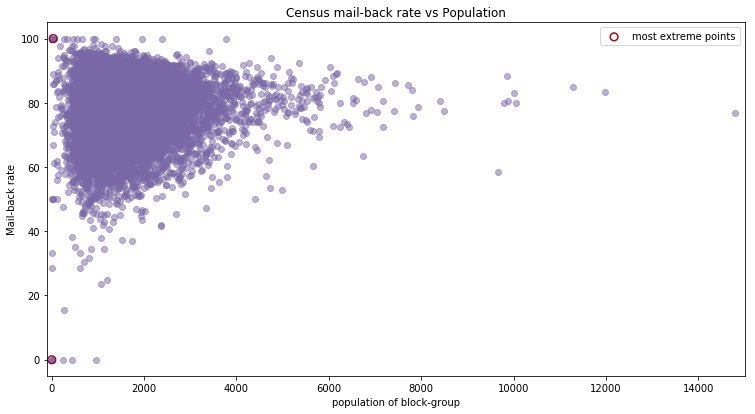

In [7]:
figsize(12.5, 6.5)
data = np.genfromtxt("./data/census_data.csv", skip_header=1, delimiter= ",")
plt.scatter(data[:,1], data[:,0], alpha=0.5, c="#7A68A6")
plt.title("Census mail-back rate vs Population")
plt.ylabel("Mail-back rate")
plt.xlabel("population of block-group")
plt.xlim(-100, 15e3 )
plt.ylim( -5, 105)

i_min = np.argmin(data[:,0])
i_max = np.argmax(data[:,0])

plt.scatter([data[i_min, 1], data[i_max, 1]],
           [data[i_min, 0], data[i_max, 0]],
           s = 60, marker="o", facecolors="none", edgecolors = "#A60628", linewidths = 1.5, label="most extreme points")

plt.legend(scatterpoints=1)

In [10]:
from urllib.request import urlretrieve

urlretrieve("https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter4_TheGreatestTheoremNeverTold/top_showerthoughts_submissions.py", 
            "top_showerthoughts_submissions.py")

import praw

In [11]:
#adding a number to the end of the %run call with get the ith top post.
%run top_showerthoughts_submissions.py 2

print("Post contents: \n")
print(top_post)

Post contents: 

Owning a dog has made realize that commercials with ringing doorbells or people knocking on the door should be banned


In [12]:
"""
contents: an array of the text from the last 100 top submissions to a subreddit
votes: a 2d numpy array of upvotes, downvotes for each submission.
"""
n_submissions = len(votes)
submissions = np.random.randint(n_submissions, size=4)
print("Some Submissions (out of %d total) \n-----------"%n_submissions)
for i in submissions:
    print('"' + contents[i] + '"')
    print("upvotes/downvotes: ",votes[i,:], "\n")

Some Submissions (out of 98 total) 
-----------
"Public transport etiquette should be taught at schools."
upvotes/downvotes:  [51 10] 

"There are a lot of unwritten rules that you have to follow if you own a large white van to avoid being creepy."
upvotes/downvotes:  [18  0] 

"There are a lot of unwritten rules that you have to follow if you own a large white van to avoid being creepy."
upvotes/downvotes:  [18  0] 

"“Don’t drink seawater, fish pee in it” is the equivalent of “Don’t breathe air, humans fart in it”"
upvotes/downvotes:  [718  89] 



In [13]:
def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    """
    This function accepts the number of upvotes and downvotes a particular submission recieved, 
    and the number of posterior samples to return to the user. Assumes a uniform prior.
    """
    N = upvotes + downvotes
    with pm.Model() as model:
        upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
        observations = pm.Binomial("obs", N, upvote_ratio, observed=upvotes)
        
        trace = pm.sample(samples, step=pm.Metropolis())
    
    burned_trace = trace[int(samples / 4):]
    return burned_trace["upvote_ratio"]

100%|██████████| 20500/20500 [00:02<00:00, 8055.34it/s]


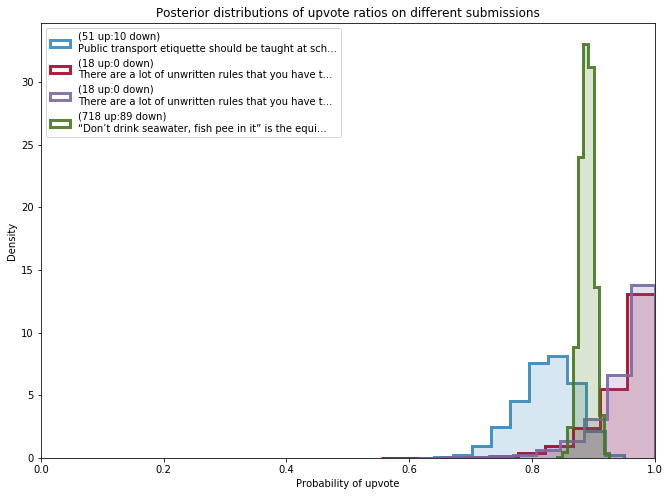

In [15]:
figsize(11., 8)
posteriors = []
colours = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(submissions)):
    j = submissions[i]
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j,1]))
    plt.hist(posteriors[i], bins=10, normed=True, alpha=0.9, histtype="step",color = colours[i%5], lw = 3,
            label = '(%d up:%d down)\n%s...'%(votes[j, 0], votes[j,1], contents[j][:50]) )
    plt.hist( posteriors[i], bins = 10, normed = True, alpha = .2, 
            histtype="stepfilled",color = colours[i], lw = 3, )

plt.legend(loc="upper left")
plt.xlim( 0, 1)
plt.ylabel("Density")
plt.xlabel("Probability of upvote")
plt.title("Posterior distributions of upvote ratios on different submissions")

[3 2 1 0] [0.74225731183213306, 0.85329399421465701, 0.85550903621638708, 0.87032300551440989]


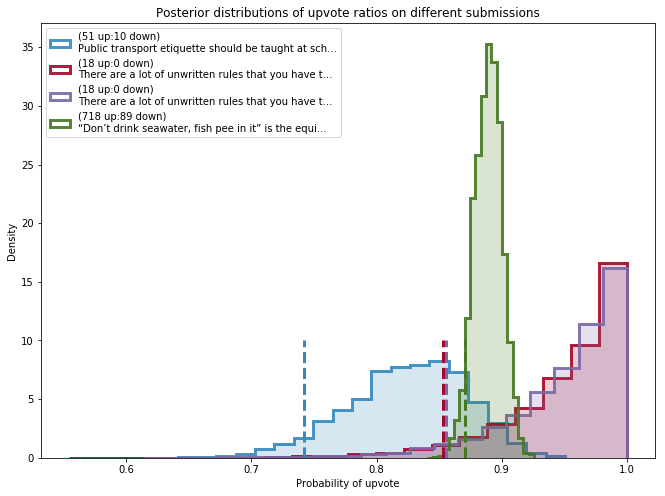

In [19]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(submissions)):
    j = submissions[i]
    plt.hist(posteriors[i], bins=20, normed=True, alpha=0.9, 
            histtype="step",color = colours[i], lw = 3,
            label = '(%d up:%d down)\n%s...'%(votes[j, 0], votes[j,1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.2, histtype="stepfilled",color = colours[i], lw = 3)
    v = np.sort( posteriors[i] )[ int(0.05*N) ]
    plt.vlines( v, 0, 10 , color = colours[i], linestyles = "--",  linewidths=3  )
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.legend(loc="upper left")
plt.ylabel("Density")
plt.xlabel("Probability of upvote")
plt.title("Posterior distributions of upvote ratios on different submissions");
order = np.argsort( -np.array( lower_limits ) )
print(order, lower_limits)

In [20]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    mu = a/(a+b)
    std_err = 1.65*np.sqrt((a*b)/( (a+b)**2*(a+b+1.) ))
    return (mu, std_err)

print("Approximate lower bounds:")
posterior_mean, std_err = intervals(votes[:,0], votes[:,1])
lb = posterior_mean - std_err
print(lb)
print("\n")
print("Top 40 Sorted according to approximate lower bounds:")
print("\n")
order = np.argsort(-lb)
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
    print(votes[i,0], votes[i,1], contents[i])
    print("------------")

Approximate lower bounds:
[ 0.94311627  0.95225252  0.94928175  0.93553061  0.93523292  0.87052188
  0.82743405  0.90031715  0.93204372  0.8349703   0.91734995  0.89557821
  0.94691718  0.89978225  0.89005352  0.87480153  0.85451281  0.75058987
  0.90900748  0.7199165   0.86149498  0.87873941  0.88485037  0.83083459
  0.77421252  0.87851405  0.78162589  0.82340587  0.77599187  0.78503639
  0.74724612  0.81194296  0.84298539  0.85896877  0.81715738  0.79250674
  0.77937278  0.81610542  0.75343739  0.86275119  0.87660217  0.86275119
  0.81835425  0.75814188  0.79811635  0.84890274  0.77620843  0.79445943
  0.71640751  0.79563834  0.6349871   0.82732512  0.74709869  0.70547099
  0.86686313  0.87264883  0.78850966  0.79473599  0.70668982  0.74537828
  0.80364062  0.79822085  0.72039455  0.81109538  0.82252857  0.74702492
  0.77318569  0.76592746  0.7137931   0.69819899  0.7137931   0.69121436
  0.59147534  0.65595263  0.87152685  0.646401    0.63841838  0.63630795
  0.67107394  0.75613569 

([<matplotlib.axis.YTick at 0x11663df60>,
 <a list of 40 Text yticklabel objects>)

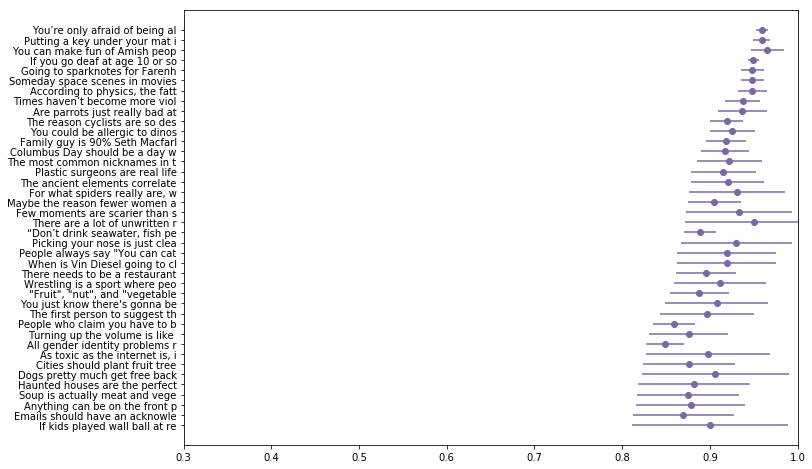

In [25]:
r_order = order[::-1][-40:]
plt.errorbar( posterior_mean[r_order], np.arange(len(r_order)), xerr=std_err[r_order], capsize=0, fmt="o", color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order) -1, -1, -1), map(lambda x: x[:30].replace("\n", ""), ordered_contents))